In [1]:
%matplotlib widget 
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
from chipcalibration import punchout as po
import chipcalibration.config as cfg
from importlib import reload

In [2]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)
chanmap = {'Q0':7,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':2}


In [3]:
runner = rc.CircuitRunnerClient(ip='192.168.1.247')

In [4]:
qubits = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']
#qubit_dict = punchout.get_qubit_dict(qubits, qchip)
reload(po)
punchout = po.Punchout(qchip, fpga_config, channel_config, qubits, atten_stop=42)
#s11 = punchout.run_punchout(qubit_dict, qchip, fpga_config, channel_config, runner)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

In [5]:
punchout.run(runner)

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


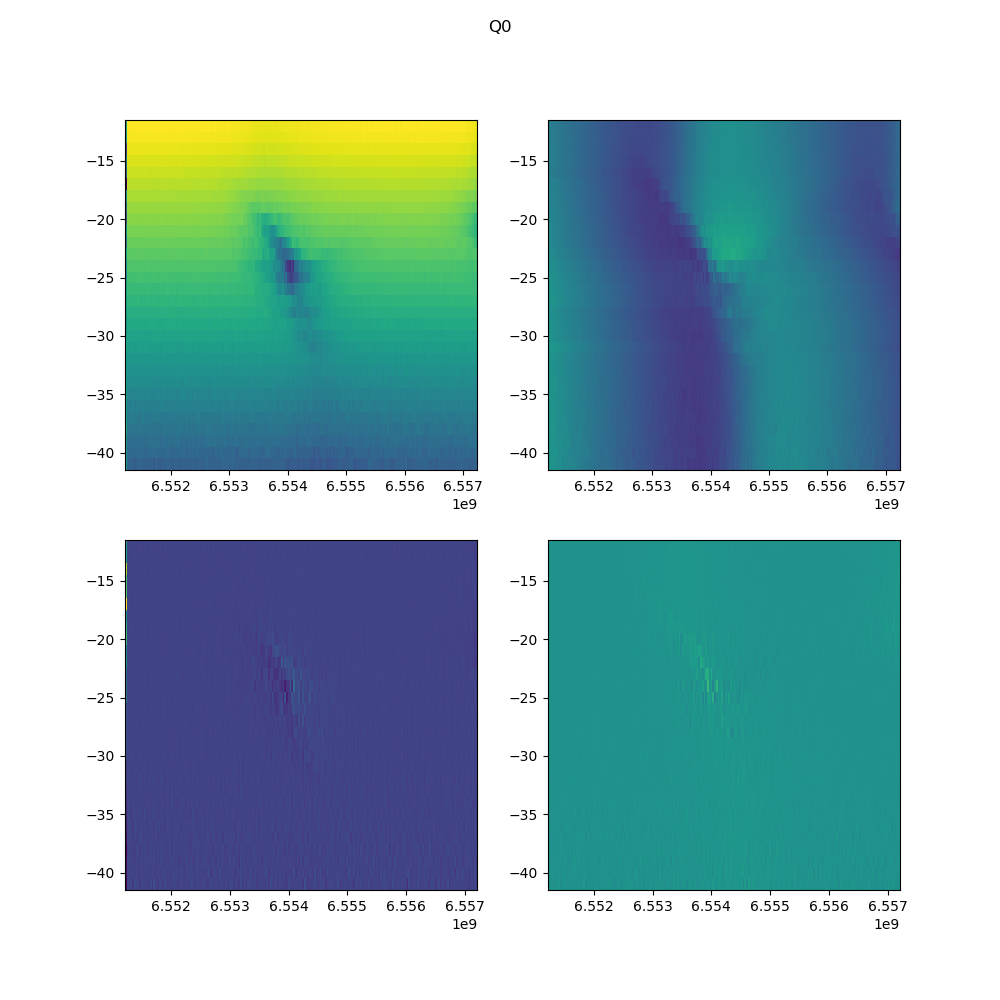

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


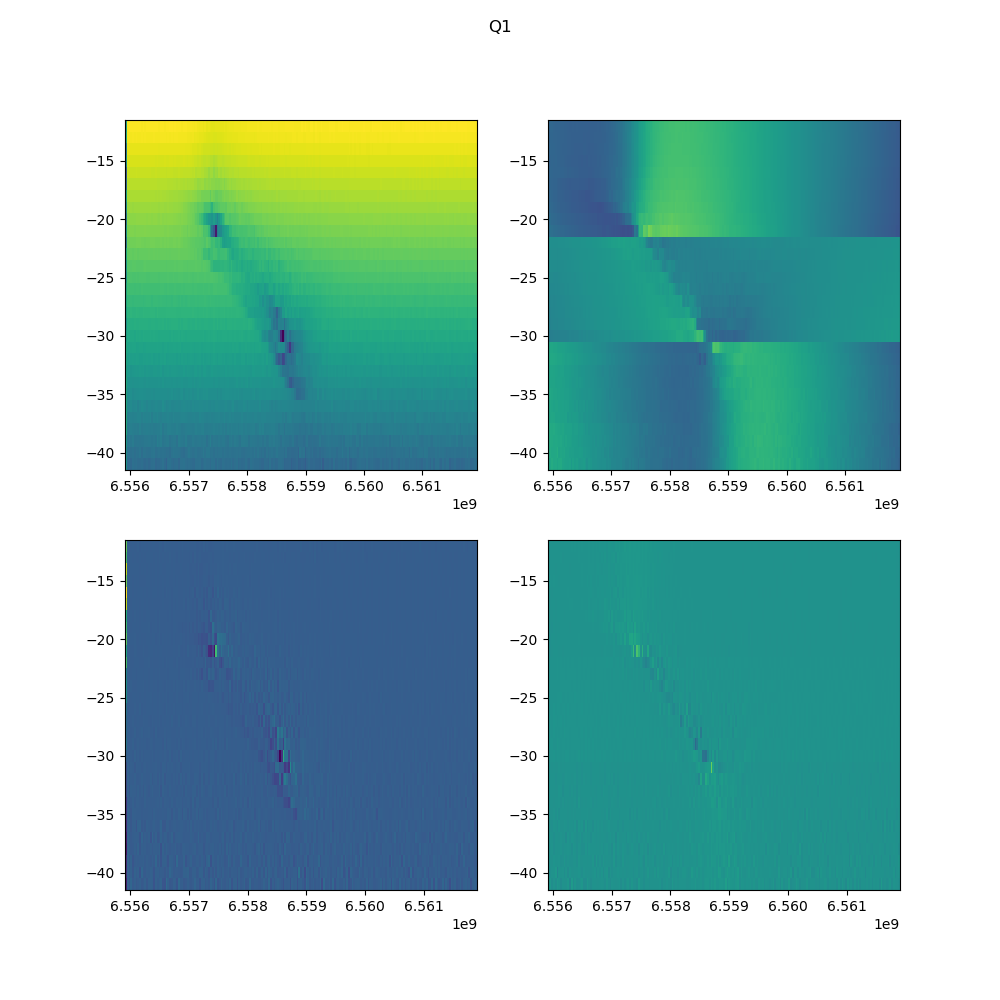

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


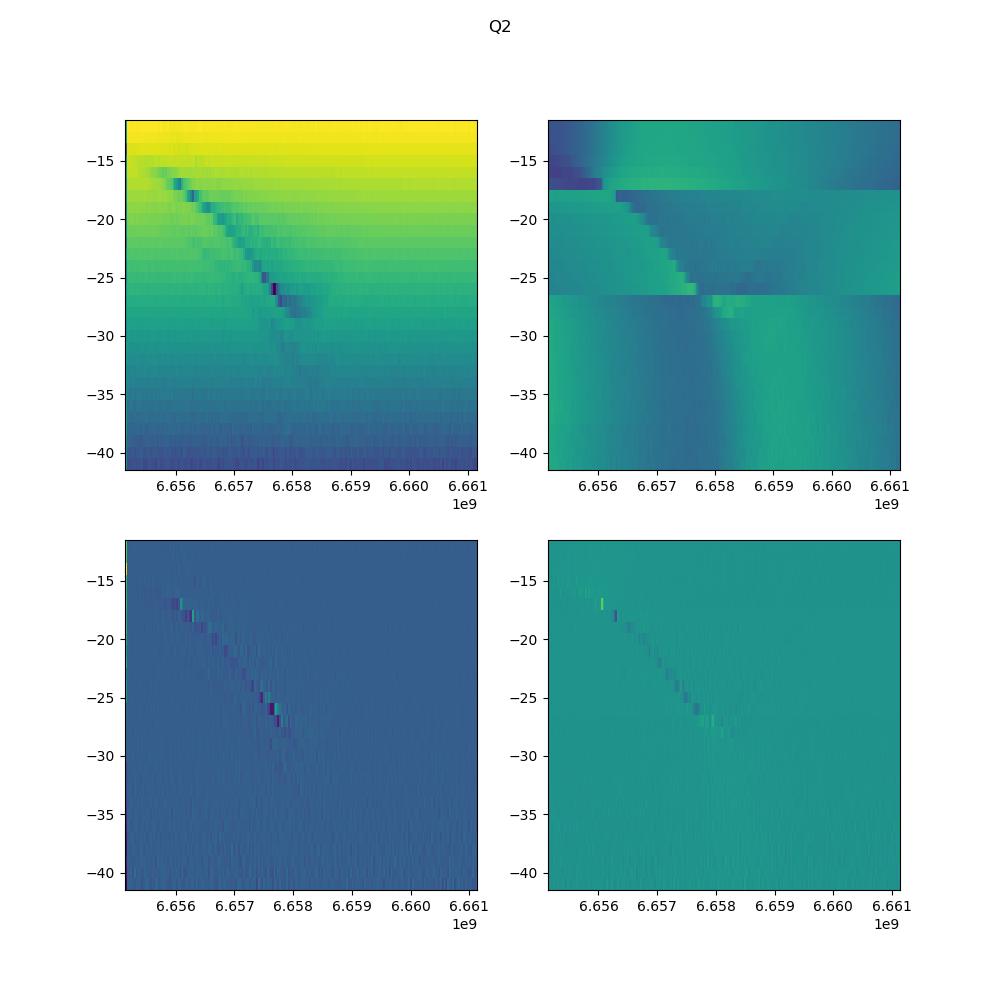

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


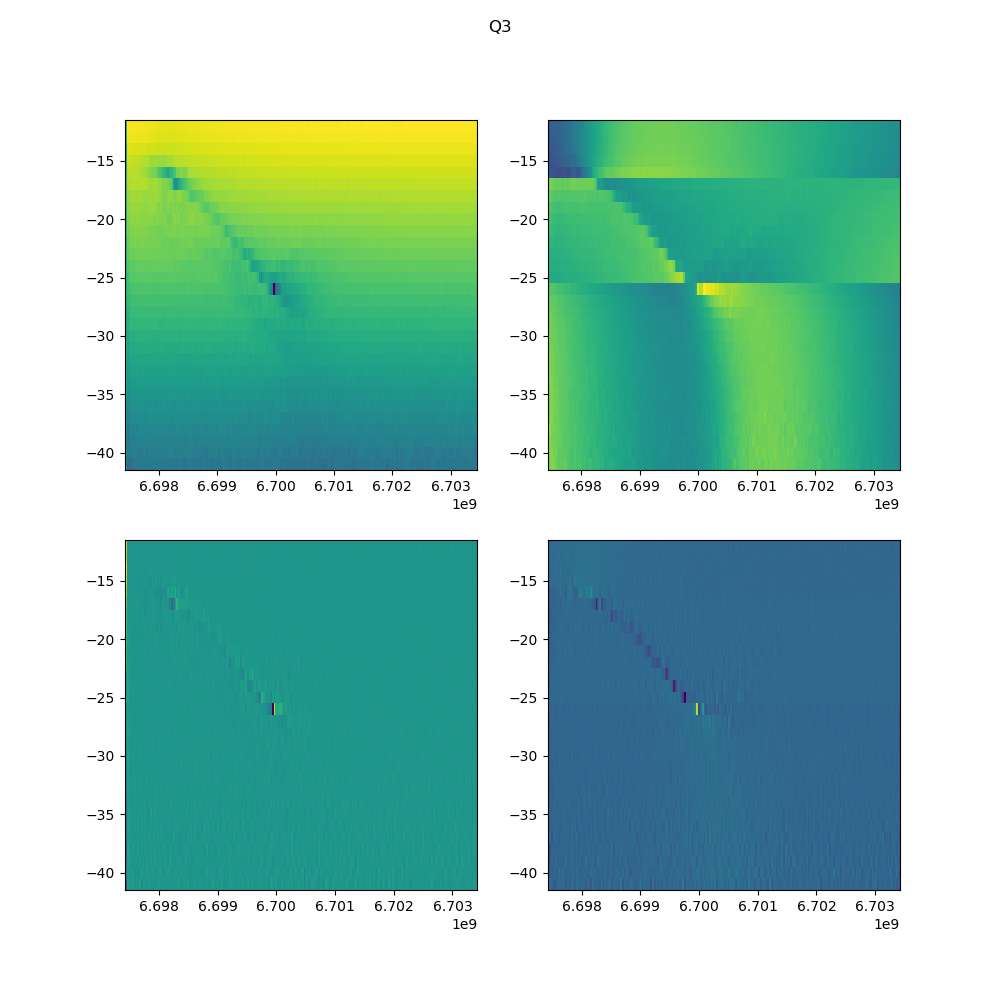

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


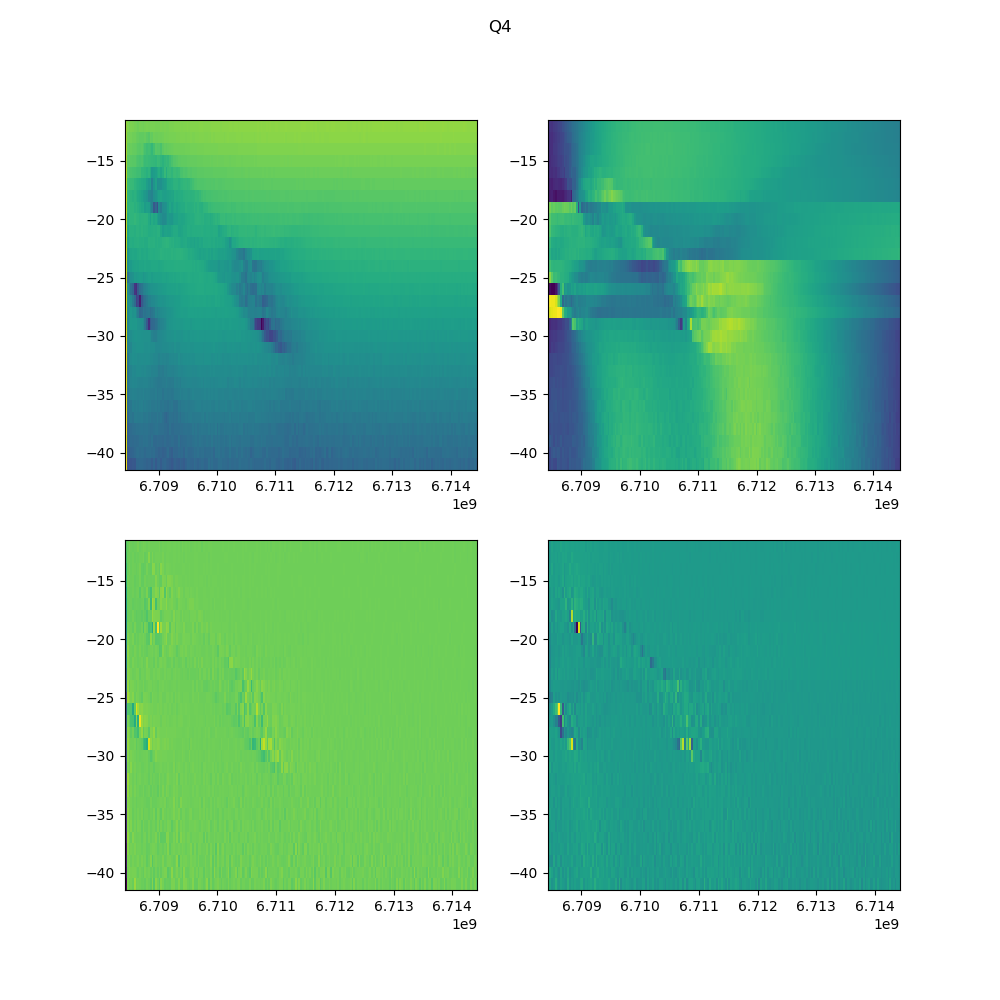

In [6]:
# %matplotlib qt
# reload(po)
# a = po.PunchoutGUI(punchout.freqs['Q0'], punchout.attens, punchout.s11['Q0'])
# plt.pcolormesh(punchout.freqs['Q1'], -punchout.attens, np.log10(np.abs(punchout.s11['Q1'])))
# plt.show()
# plt.pcolormesh(punchout.freqs['Q1'], -punchout.attens, np.angle(punchout.s11['Q1']))
# plt.show()
# plt.pcolormesh(punchout.freqs['Q1'][:-1], -punchout.attens, np.diff(np.angle(punchout.s11['Q1'])))
#%matplotlib notebook
punchout.run_punchout_gui()

In [10]:
# when done clicking, grab values, print some out, then save and update qchip

punchout.get_calgui_vals()
punchout.optimal_atten

In [16]:
# when done clicking, grab values, print some out, then save and update qchip

punchout.get_calgui_vals()
punchout.optimal_atten

{'Q0': -34.297142246791296,
 'Q1': -37.691428484235495,
 'Q2': None,
 'Q3': -34.58285740443639,
 'Q4': -35.834285191127236}

In [8]:
punchout.update_qchip(qchip)

In [10]:
qchip.save('../submodules/qchip/X4Y2/X4Y2_punchout.json')

In [33]:
s11?

In [35]:
runner._pl_driver?

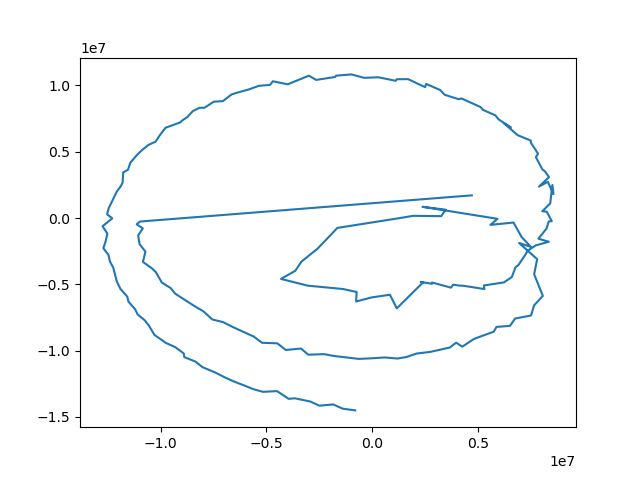

In [14]:
plt.figure()
plt.plot(np.real(punchout.s11['Q1'][10]), np.imag(punchout.s11['Q1'][10]))
plt.show()